In [52]:
import pandas  as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import time

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score,max_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [53]:
### to use full dataset comment off following line

# cat_dataset = pd.read_csv("../0.Datasets/processed/processed_car_data.csv") # Full DataSet
cat_dataset = pd.read_csv("../0.Datasets/processed/sliced_car_data.csv")
cat_dataset.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,sale_day,sale_date
0,2015,Chevrolet,Impala,LTZ,Sedan,automatic,2g1165s30f9103921,ca,19.000000,14538.0,silver,black,enterprise vehicle exchange / tra / rental / t...,24300.0,7200.0,Tue,2015-07-07 09:30:00
1,2014,BMW,5 Series,528i,Sedan,automatic,wba5a5c51ed501631,ca,29.000000,25969.0,black,black,financial services remarketing (lease),34200.0,30000.0,Tue,2015-02-03 04:30:00
2,2014,Chevrolet,Camaro,LT,Convertible,automatic,2g1fb3d31e9134662,ca,30.672365,33450.0,black,black,avis rac/san leandro,20100.0,14700.0,Tue,2014-12-16 12:00:00
3,2015,Audi,A3,1.8 TFSI Premium,Sedan,automatic,wauacgff7f1002327,ca,49.000000,5826.0,gray,black,audi north scottsdale,24000.0,23750.0,Thu,2014-12-18 12:30:00
4,2014,BMW,6 Series,650i,Convertible,automatic,wbayp9c57ed169262,ca,38.000000,10736.0,black,black,the hertz corporation,67000.0,65000.0,Tue,2015-01-06 12:30:00


In [54]:
x = cat_dataset[['make','condition','odometer','mmr']]
x

,make,condition,odometer,mmr
0,Chevrolet,19.000000,14538.0,24300.0
1,BMW,29.000000,25969.0,34200.0
2,Chevrolet,30.672365,33450.0,20100.0
3,Audi,49.000000,5826.0,24000.0
4,BMW,38.000000,10736.0,67000.0
5,Hyundai,30.672365,9281.0,15150.0
6,Volvo,42.000000,16506.0,32100.0
7,Volvo,48.000000,12725.0,32300.0
8,BMW,30.672365,11278.0,50400.0
9,Chevrolet,42.000000,11874.0,22200.0


In [55]:
y = cat_dataset['sellingprice']
y

0      7200.0
1     30000.0
2     14700.0
3     23750.0
4     65000.0
5      8500.0
6     32500.0
7     32500.0
8     34000.0
9     19500.0
10    11500.0
11    47500.0
12    20750.0
13    44500.0
14    21000.0
15     9200.0
16    59900.0
17    30500.0
18    64250.0
19    27500.0
Name: sellingprice, dtype: float64

In [56]:

# x_train, x_test, y_train, y_test = train_test_split(x,ytest_size = 0.3, random_state = 0)

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.4, random_state = 0)

In [57]:
x_train

,make,condition,odometer,mmr
4,BMW,38.000000,10736.0,67000.0
2,Chevrolet,30.672365,33450.0,20100.0
5,Hyundai,30.672365,9281.0,15150.0
14,Kia,44.000000,12862.0,20700.0
9,Chevrolet,42.000000,11874.0,22200.0
7,Volvo,48.000000,12725.0,32300.0
16,Chevrolet,45.000000,11426.0,57300.0
11,Audi,42.000000,9606.0,48600.0
3,Audi,49.000000,5826.0,24000.0
0,Chevrolet,19.000000,14538.0,24300.0


In [58]:
y_train

4     65000.0
2     14700.0
5      8500.0
14    21000.0
9     19500.0
7     32500.0
16    59900.0
11    47500.0
3     23750.0
0      7200.0
15     9200.0
12    20750.0
Name: sellingprice, dtype: float64

In [59]:
numeric = ['condition','mmr','odometer']
numeric_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy ='mean')),
    ('scaler', StandardScaler())
])


In [60]:
categorical = ['make']
categorical_transformer = Pipeline(steps = [
    ('onehot', OneHotEncoder(drop = 'first'))
])

In [61]:
preprocessor = ColumnTransformer(
        transformers =[
            ('num',numeric_transformer, numeric ),
            ('cat',categorical_transformer, categorical ),
        ]
        
)

In [62]:
x_train_processed = preprocessor.fit_transform(x_train)
x_test_processed = preprocessor.transform(x_test)

In [63]:
x_train_processed

array([[ 0.32600185,  2.19180689, -0.45611081,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [-0.14660129, -0.63257529,  2.92402003,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ],
       [-0.14660129, -0.93067107, -0.67263324,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ],
       [ 0.71297784, -0.59644247, -0.13973509,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ],
       [ 0.58398584, -0.50611042, -0.286762  ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ],
       [ 0.97096183,  0.1021254 , -0.16012243,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ],
       [ 0.77747384,  1.60765962, -0.35343008,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ],
       [ 0.58398584,  1.08373371, -0.62426912,  0.        ,  0

In [64]:
regressor = LinearRegression()

In [65]:

strat_time = time.time()

regressor.fit(x_train_processed, y_train)

end_time = time.time()

print(f"execution time {end_time - strat_time}")

execution time 0.0029449462890625


In [66]:
Y_predict = regressor.predict(x_test_processed)
Y_predict

array([63328.15441425, 26211.07979992, 22877.15776148, 43892.16408666,
        6610.30942759, 15495.97436204, 31429.23496653, 45814.73163224])

In [67]:
print(np.array(y_test))

[64250. 30000. 27500. 34000. 11500. 30500. 32500. 44500.]


In [68]:
print(f'r2 score :{r2_score(y_test, Y_predict)}')
print(f'mean_absolute_error :{mean_absolute_error(y_test, Y_predict)}')
print(f'mean_squared_error :{mean_squared_error(y_test, Y_predict)}')
print(f'max_error :{max_error(y_test, Y_predict)}')


r2 score :0.7590469509926828
mean_absolute_error :5188.123123386388
mean_squared_error :48292026.563301474
max_error :15004.025637961164


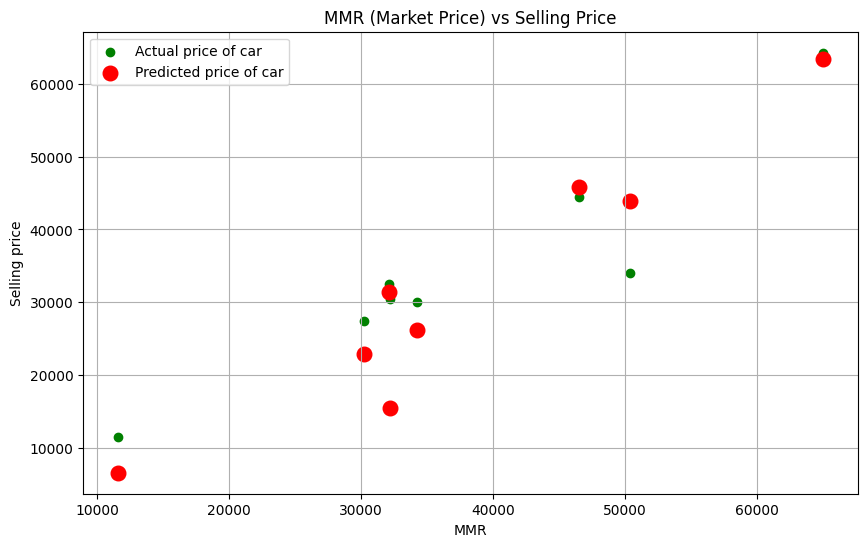

In [69]:
plt.figure(figsize=(10, 6))
plt.scatter(x_test['mmr'], y_test, color='green', label='Actual price of car')
plt.scatter(x_test['mmr'], Y_predict, color='red', label='Predicted price of car', s=110)
plt.xlabel('MMR')
plt.ylabel('Selling price')
plt.title('MMR (Market Price) vs Selling Price')

plt.grid()
plt.legend()
plt.savefig("./Graph/2.actual_vs_predicted.png")
plt.show()

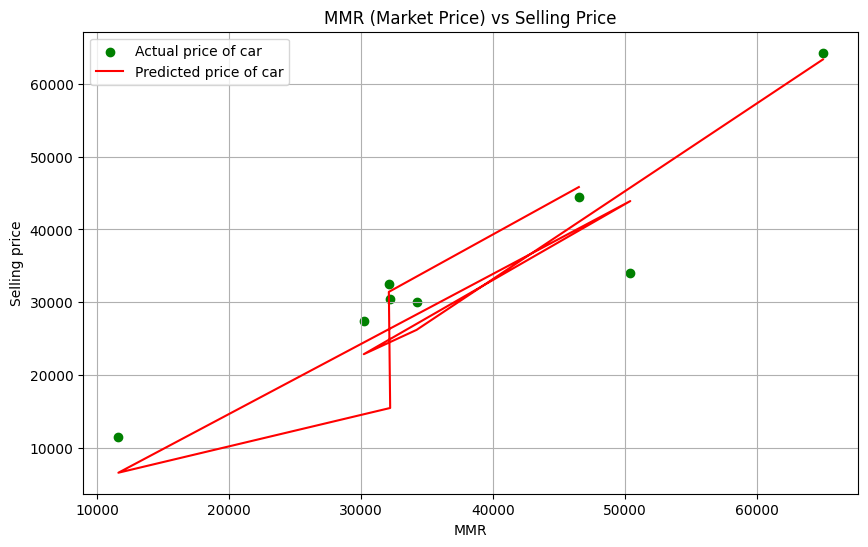

In [70]:
plt.figure(figsize=(10, 6))
plt.scatter(x_test['mmr'], y_test, color='green', label='Actual price of car')
plt.plot (x_test['mmr'], Y_predict, color='red', label='Predicted price of car')

plt.xlabel('MMR')
plt.ylabel('Selling price')
plt.title('MMR (Market Price) vs Selling Price')

plt.grid()
plt.legend()
plt.savefig("./Graph/2.mmr_vs_sellingprice_regression.png")
plt.show()